# 一元线性回归

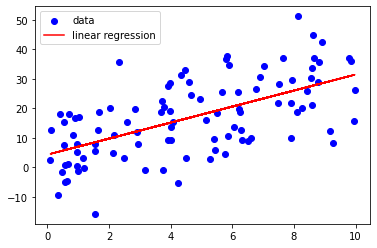

RMSE: 10.412108425751445
R2 score: 0.37038106518427033


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 生成随机数据集
def generate_data(num_samples=100, noise=10):
    X = np.random.rand(num_samples) * 10
    y = 3 * X + noise * np.random.randn(num_samples)
    return X, y

# 最小二乘法
def least_squares(X, y):
    X = np.column_stack((np.ones(len(X)), X))
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

# 计算均方根误差（RMSE）和决定系数（R2 score）
def evaluate(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    ssr = np.sum((y_pred - y_true.mean()) ** 2)
    sst = np.sum((y_true - y_true.mean()) ** 2)
    r2 = ssr / sst
    return rmse, r2

# 生成数据集
X, y = generate_data()

# 计算回归系数
theta = least_squares(X, y)

# 画出拟合曲线和数据散点图
plt.scatter(X, y, color='blue', label='data')
plt.plot(X, np.dot(np.column_stack((np.ones(len(X)), X)), theta), color='red', label='linear regression')
plt.legend(loc='best')
plt.show()

# 计算评价指标
y_pred = np.dot(np.column_stack((np.ones(len(X)), X)), theta)
rmse, r2 = evaluate(y, y_pred)
print("RMSE:", rmse)
print("R2 score:", r2)


# 多元线性回归

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据集
def load_data():
    dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values
    return X, y

# 数据预处理
def preprocess_data(X):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_norm = (X - X_mean) / X_std
    X_norm = np.column_stack((np.ones(len(X_norm)), X_norm))
    return X_norm

# 最小二乘法
def least_squares(X, y):
    X_T_X = np.dot(X.T, X)
    det = np.linalg.det(X_T_X) # 行列式
    if det == 0:
        print("The matrix is singular, cannot be inverted")
        return None
    else:
        theta = np.dot(np.dot(np.linalg.inv(X_T_X), X.T), y)
        return theta

# 计算均方根误差（RMSE）和决定系数（R2 score）
def evaluate(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    ssr = np.sum((y_pred - y_true.mean()) ** 2)
    sst = np.sum((y_true - y_true.mean()) ** 2)
    r2 = ssr / sst
    return rmse, r2

# 加载数据集
X, y = load_data()

# 数据预处理
X = preprocess_data(X)

# 计算回归系数
theta = least_squares(X, y)
if theta is None:
    exit()

# 计算评价指标
rmse, r2 = evaluate(y, y_pred)
print("RMSE:", rmse)
print("R2 score:", r2)


RMSE: 4.679191295697282
R2 score: 0.740642664109407


# 岭回归

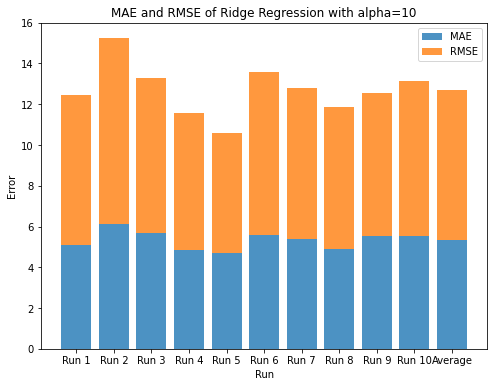

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+', names=column_names)

# 提取2列作为训练集
X = data[['RM', 'DIS']].values
y = data['MEDV'].values


def ridge_regression(X, y, alpha):
    """
    实现Ridge回归模型

    参数：
        X - 自变量，形状为(n_samples, n_features)
        y - 因变量，形状为(n_samples, )
        alpha - 正则化系数

    返回值：
        回归系数，形状为(n_features, )
    """
    n_features = X.shape[1]
    A = np.dot(X.T, X) + alpha * np.identity(n_features)
    b = np.dot(X.T, y)
    return np.linalg.solve(A, b)


# 将D2随机划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
# 使用训练集训练Ridge回归模型
alpha = 10
coef = ridge_regression(X_train, y_train, alpha)

# 重复以上步骤5次或以上，获取多组MAE和RMSE值，并绘制条形图
n_runs = 10
mae_list = []
rmse_list = []
for i in range(n_runs):
    # 将D2随机划分为训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # 使用训练集训练Ridge回归模型
    coef = ridge_regression(X_train, y_train, alpha)

    # 在测试集上进行测试，并计算MAE和RMSE
    y_pred = np.dot(X_test, coef)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    mae_list.append(mae)
    rmse_list.append(rmse)

# 将多组MAE和RMSE值绘制成条形图
plt.figure(figsize=(8, 6))
index = np.arange(n_runs+1)
opacity = 0.8

# 绘制MAE条形图
plt.bar(index, mae_list+[np.mean(mae_list)], alpha=opacity, label='MAE')
# 绘制RMSE条形图
plt.bar(index, rmse_list+[np.mean(rmse_list)], alpha=opacity,
        label='RMSE', bottom=mae_list+[np.mean(mae_list)])

# 添加标签和标题
plt.xlabel('Run')
plt.ylabel('Error')
plt.title('MAE and RMSE of Ridge Regression with alpha={}'.format(alpha))
plt.xticks(index, ['Run {}'.format(i+1) for i in range(n_runs)]+['Average'])

plt.legend()

plt.show()
